In [1]:
%matplotlib inline

In [97]:
run donors.py

In [98]:
st = DonorSingletTriplet()

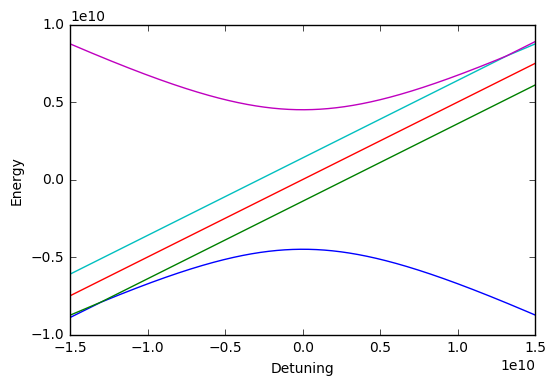

In [139]:
# plt.ylim(-0.2e9,0.2e9)
st.plot_spectrum_vs_detuning(-15e9,15e9,b_z=0.1,dBz=0.005,tc=4.5e9)

In [45]:
vals, vecs = st.Hamiltonian.eigenstates()

In [51]:
# The project_eigenvecs function seems to be working fine
st.project_eigenvecs(vecs[4])

Quantum object: dims = [[5], [1]], shape = [5, 1], type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]

In [143]:
# Ok, now let's try and do a detuning pulse, and plot the projection vector over time
output, times = st.do_detuning_pulse(45e9,-45e9, psi0=st.S20, ramp_time=10e-9, tunnel_coupling=4.5e9)

In [144]:
# Pre-allocate array to store projections in
proj_vector = np.zeros((len(times), 5))
for ind,val in enumerate(output.states):
    proj_vector[ind] = st.project_eigenvecs(val)

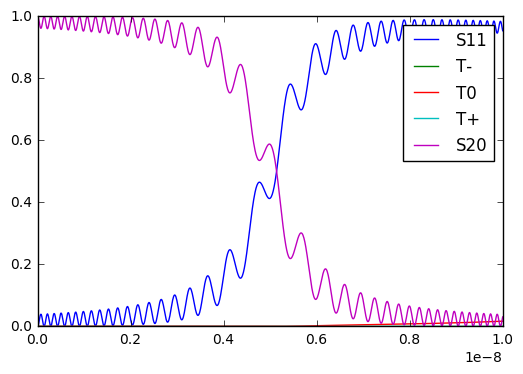

In [145]:
plt.plot(times, proj_vector)
plt.legend(['S11', 'T-', 'T0', 'T+', 'S20'])
plt.show()

In [130]:
updn = (st.S11 - st.T0).unit()

In [131]:
np.abs(updn.overlap(output.states[-1]))**2

0.99956552744247684